<h1><center>Analysis of Fight Data and Predicting Prices With Machine Learning</center></h1>

In this program, we will analyse Flight data, perform Exploratory Data Analysis (EDA), and predict prices by testing different regression models. For this program we are going to use Data avaliable on Kaggle

# Importing  Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

In [4]:
train_data = pd.read_excel("Flight_Data_Training.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Exploratory Data Analysis (EDA)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
#Checking Nulls
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
#Shape of data set BEFORE droping nulls
train_data.shape

(10683, 11)

In [10]:
#Shape of data set AFTER droping nulls
train_data.dropna(inplace=True)
train_data.shape

(10682, 11)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
#Shape of data set AFTER droping duplicate rows
train_data.drop_duplicates(inplace=True)
train_data.shape

(10462, 11)

In [14]:
train_data.nunique().to_frame("Unique")

,Unique
Airline,12
Date_of_Journey,44
Source,5
Destination,6
Route,128
Dep_Time,222
Arrival_Time,1343
Duration,368
Total_Stops,5
Additional_Info,10


In [16]:
#converting all coloumns contain date infomation to Datetime
def date_sep(df):
    df=df.copy()
    df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])
    df['Year_of_Journey']=df['Date_of_Journey'].dt.year
    df['Month_of_Journey']=df['Date_of_Journey'].dt.month
    df['Day_of_Journey']=df['Date_of_Journey'].dt.day
    df=df.drop(['Route', 'Date_of_Journey', 'Duration'],axis=1)
    return df

train_data = date_sep(train_data)
train_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,IndiGo,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,No info,3897,2019,3,24
1,Air India,Kolkata,Banglore,05:50,13:15,2 stops,No info,7662,2019,1,5
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,No info,13882,2019,9,6
3,IndiGo,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218,2019,12,5
4,IndiGo,Banglore,New Delhi,16:50,21:35,1 stop,No info,13302,2019,1,3


In [17]:
#converting all coloumns contain time infomation to Datetime
def time_sep(df):
    df['Departure_hour']=pd.to_datetime(df['Dep_Time']).dt.hour
    df['Departure_minute']=pd.to_datetime(df['Dep_Time']).dt.minute
    df=df.drop(['Dep_Time'],axis=1)
    df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour
    df['Arrival_minute']=pd.to_datetime(df['Arrival_Time']).dt.minute
    df=df.drop(['Arrival_Time'],axis=1)
    return df

train_data = time_sep(train_data)
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Year_of_Journey,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,2019,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,2 stops,No info,7662,2019,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,2019,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,2019,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,2019,1,3,16,50,21,35


In [18]:
train_data.nunique().to_frame("Unique Values")

,Unique Values
Airline,12
Source,5
Destination,6
Total_Stops,5
Additional_Info,10
Price,1870
Year_of_Journey,1
Month_of_Journey,7
Day_of_Journey,9
Departure_hour,24


In [19]:
train_data.drop("Year_of_Journey", axis=1, inplace=True)

## Datat Visualization

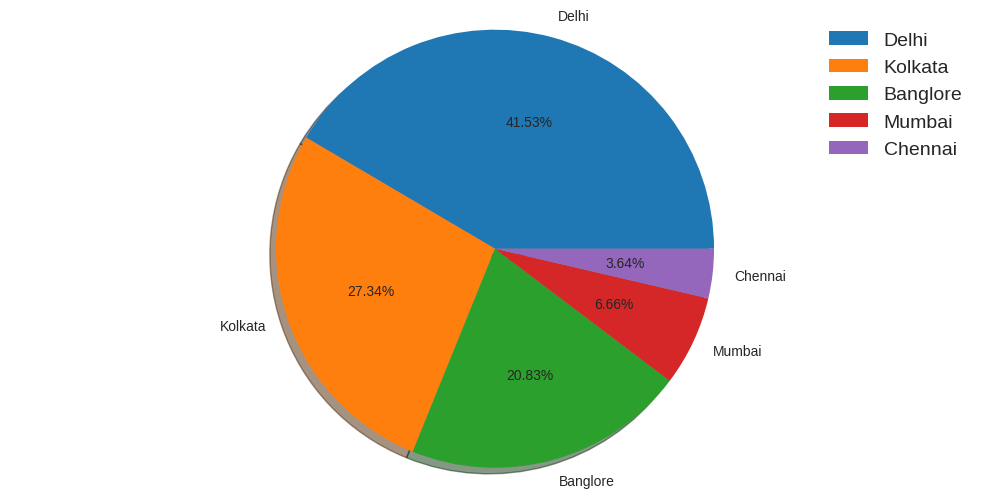

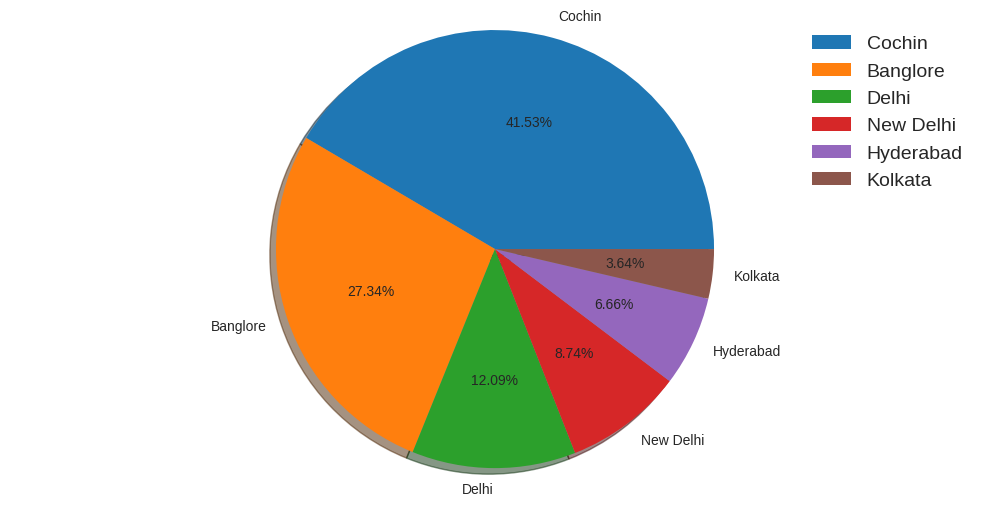

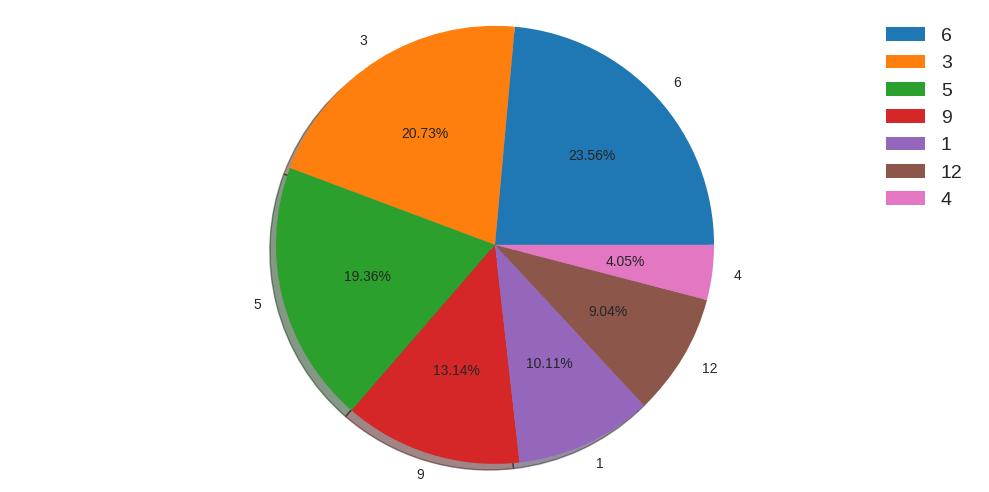

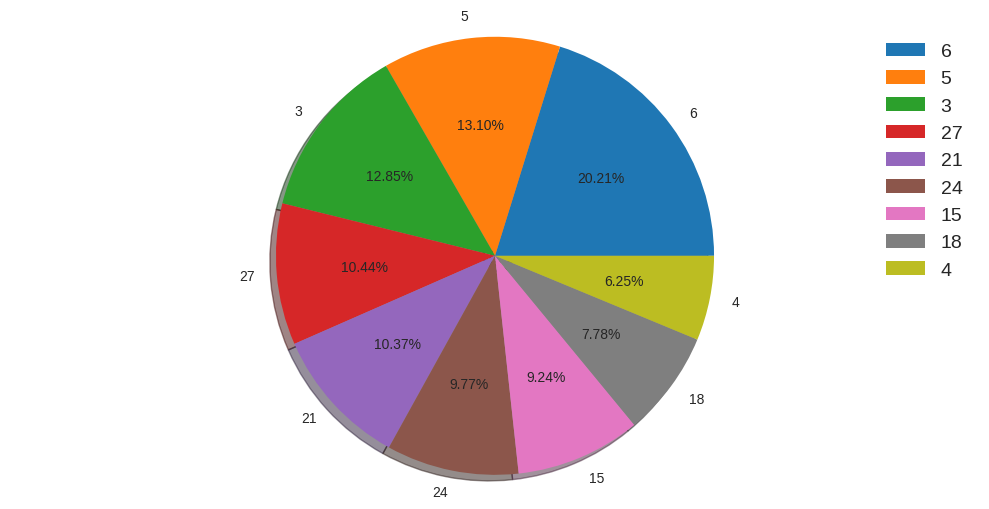

In [21]:
#Pie chart for source, destination,month and day of journey
def pie(x):
    plt.style.use('seaborn-white')
    plt.figure(figsize=(10,5))
    plt.pie(x.value_counts(), labels=x.value_counts().index, shadow=True, autopct='%1.2f%%')
    plt.legend(prop={'size':14})
    plt.axis('equal')
    plt.tight_layout()
    return plt.show()
pie(train_data['Source'])
pie(train_data['Destination'])
pie(train_data['Month_of_Journey'])
pie(train_data['Day_of_Journey'])

<Axes: xlabel='Total_Stops', ylabel='count'>

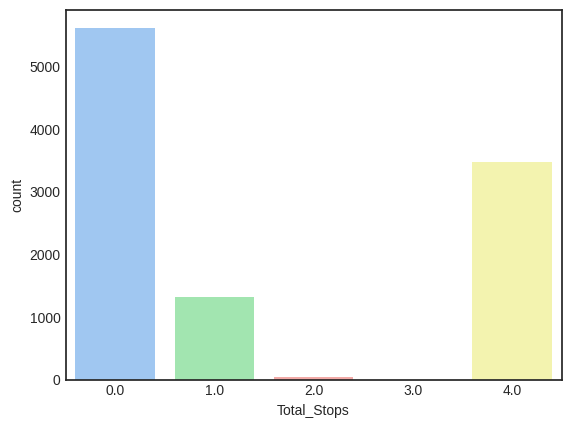

In [98]:
#Countplot for Total Stops
sns.countplot(train_data, x="Total_Stops")

<Axes: xlabel='Additional_Info', ylabel='count'>

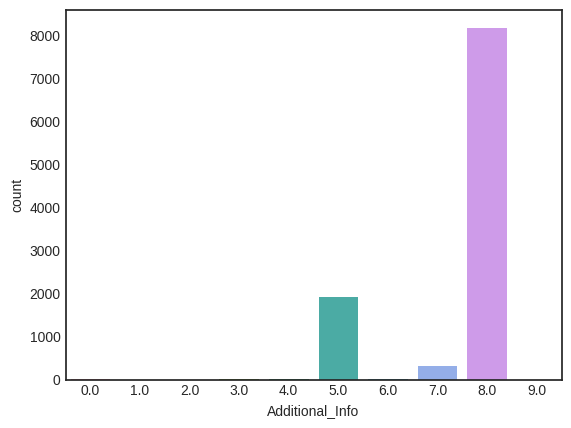

In [99]:
#Countplot for Additional Info
sns.countplot(train_data, x="Additional_Info")

<Axes: xlabel='Airline', ylabel='count'>

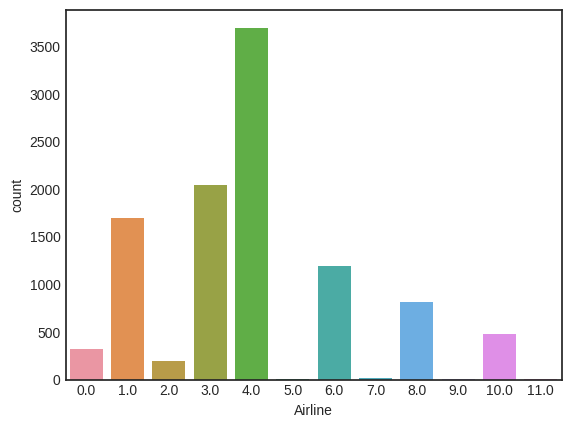

In [100]:
#Countplot for Airline
sns.countplot(train_data, x="Airline")

<Axes: xlabel='Departure_minute', ylabel='count'>

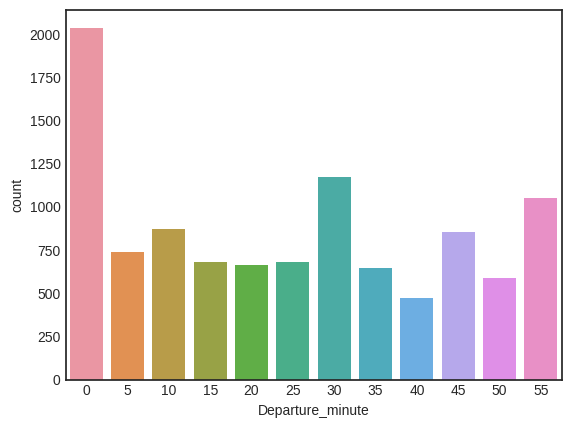

In [101]:
#Countplot for Departure minute
sns.countplot(train_data, x="Departure_minute")

<Axes: xlabel='Departure_hour', ylabel='count'>

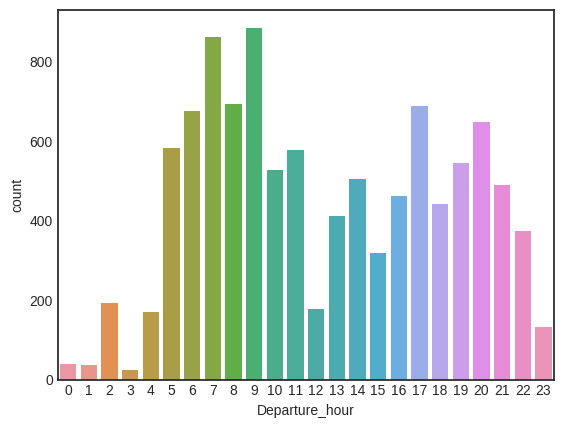

In [102]:
#Countplot for Departure hour
sns.countplot(train_data, x="Departure_hour")

<Axes: xlabel='Arrival_minute', ylabel='count'>

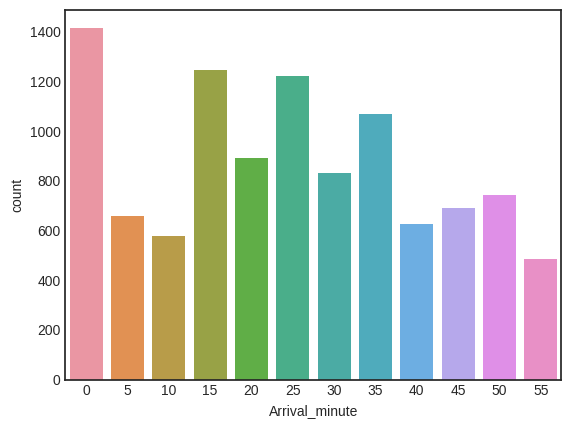

In [103]:
#Countplot for Arrival minute
sns.countplot(train_data, x="Arrival_minute")

<Axes: xlabel='Arrival_hour', ylabel='count'>

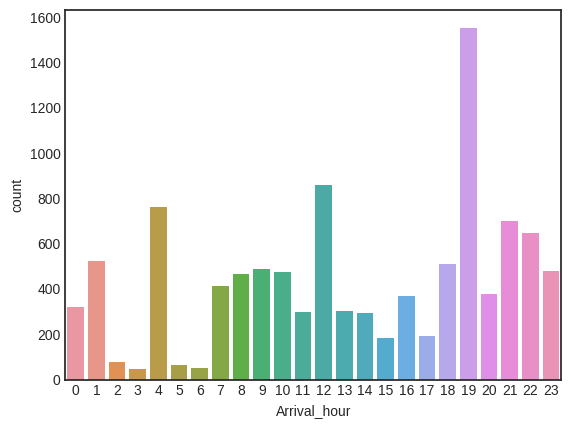

In [104]:
#Countplot for Arrival hour
sns.countplot(train_data, x="Arrival_hour")

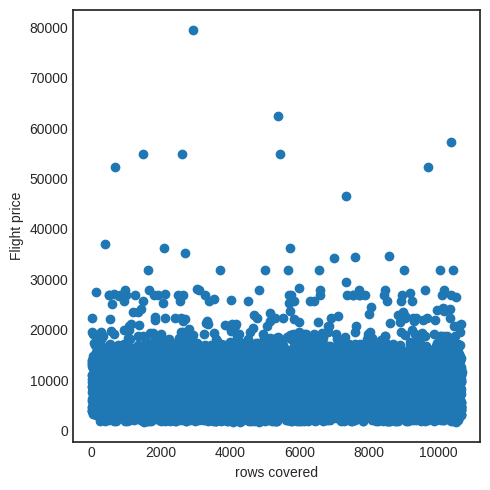

In [28]:
#scatter plot for Price vs rows covered
plt.style.use('fast')
plt.figure(figsize=(5,5))
plt.scatter(train_data.index, train_data['Price'])
plt.xlabel("rows covered")
plt.ylabel("Price")
plt.tight_layout()
plt.show()

<Axes: xlabel='Source', ylabel='Price'>

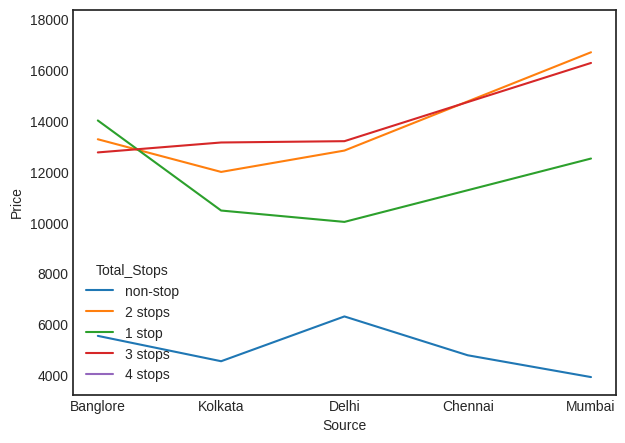

In [33]:
#Linechart for Price vs source
plt.figure(figsize=(7,5))
sns.lineplot(x='Source', y='Price', hue='Total_Stops', data=train_data, ci=None)

<Axes: xlabel='Destination', ylabel='Price'>

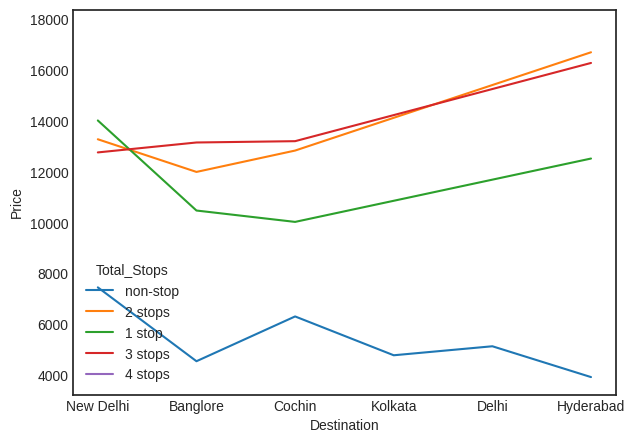

In [34]:
#Linechart for Price vs Destination
plt.figure(figsize=(7,5))
sns.lineplot(x='Destination', y='Price', hue='Total_Stops', data=train_data, ci=None)

<Axes: xlabel='Month_of_Journey', ylabel='Price'>

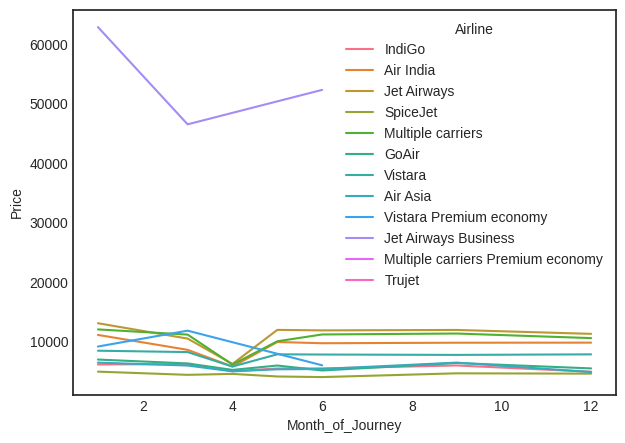

In [35]:
#Linechart for Price vs month of journey
plt.figure(figsize=(7,5))
sns.lineplot(x='Month_of_Journey', y='Price', hue='Airline', data=train_data, ci=None)

<Axes: xlabel='Day_of_Journey', ylabel='Price'>

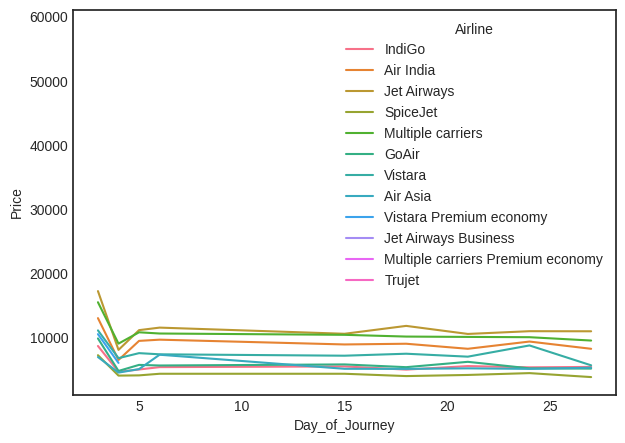

In [37]:
#Linechart for Price vs Day of journey
plt.figure(figsize=(7,5))
sns.lineplot(x='Day_of_Journey', y='Price', hue='Airline', data=train_data, ci=None)

<Axes: xlabel='Departure_minute', ylabel='Price'>

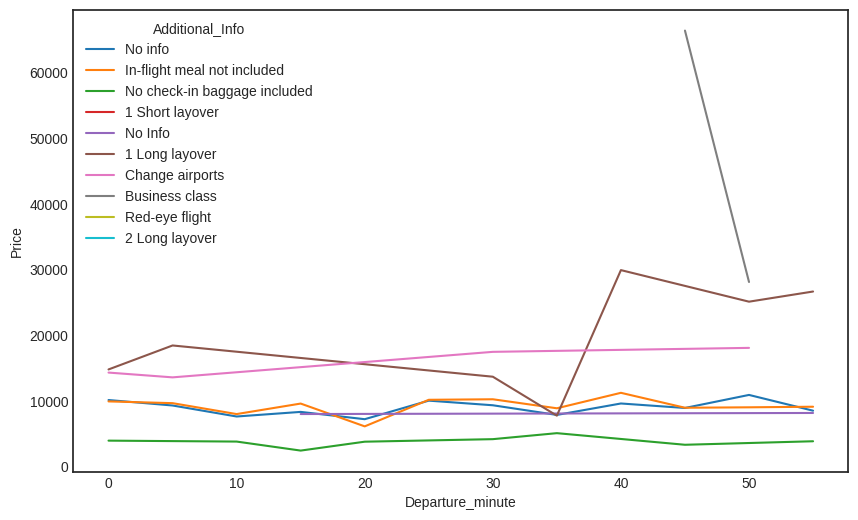

In [38]:
#Linechart for Price vs Departure_minute
plt.figure(figsize=(7,5))
sns.lineplot(x='Departure_minute', y='Price', hue='Additional_Info', data=train_data, ci=None)

<Axes: xlabel='Departure_hour', ylabel='Price'>

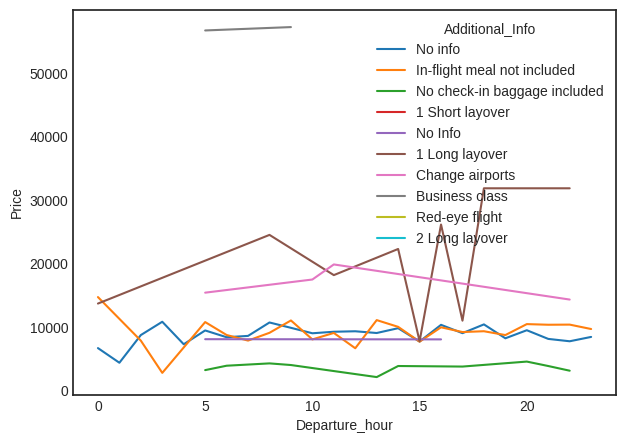

In [39]:
#Linechart for Price vs Departure_hour
plt.figure(figsize=(7,5))
sns.lineplot(x='Departure_hour', y='Price', hue='Additional_Info', data=train_data, ci=None)

<Axes: xlabel='Arrival_minute', ylabel='Price'>

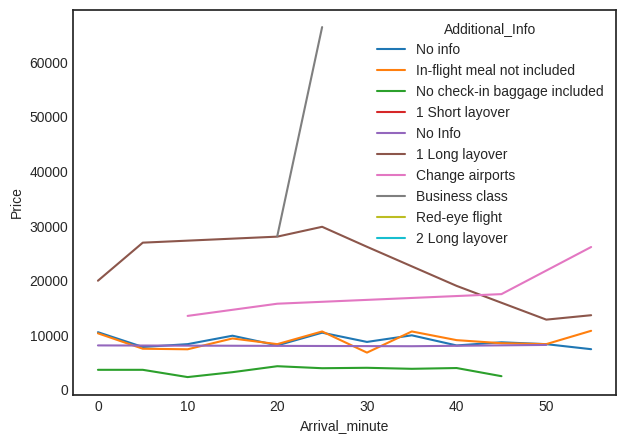

In [45]:
#Linechart for Price vs Arrival_minute
plt.figure(figsize=(7,5))
sns.lineplot(x='Arrival_minute', y='Price', hue='Additional_Info', data=train_data, ci=None)

<Axes: xlabel='Arrival_hour', ylabel='Price'>

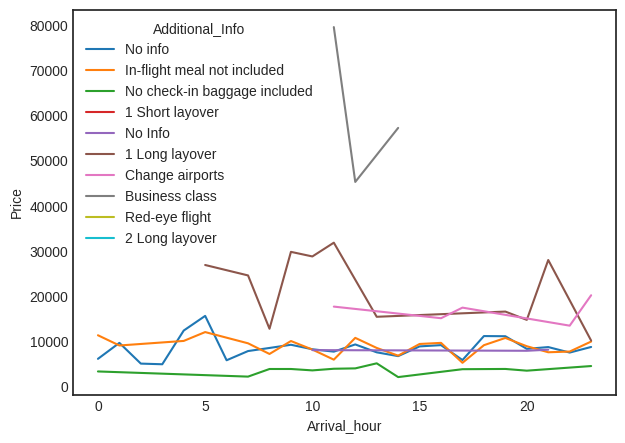

In [46]:
#Linechart for Price vs Arrival_hour
plt.figure(figsize=(7,5))
sns.lineplot(x='Arrival_hour', y='Price', hue='Additional_Info', data=train_data, ci=None)

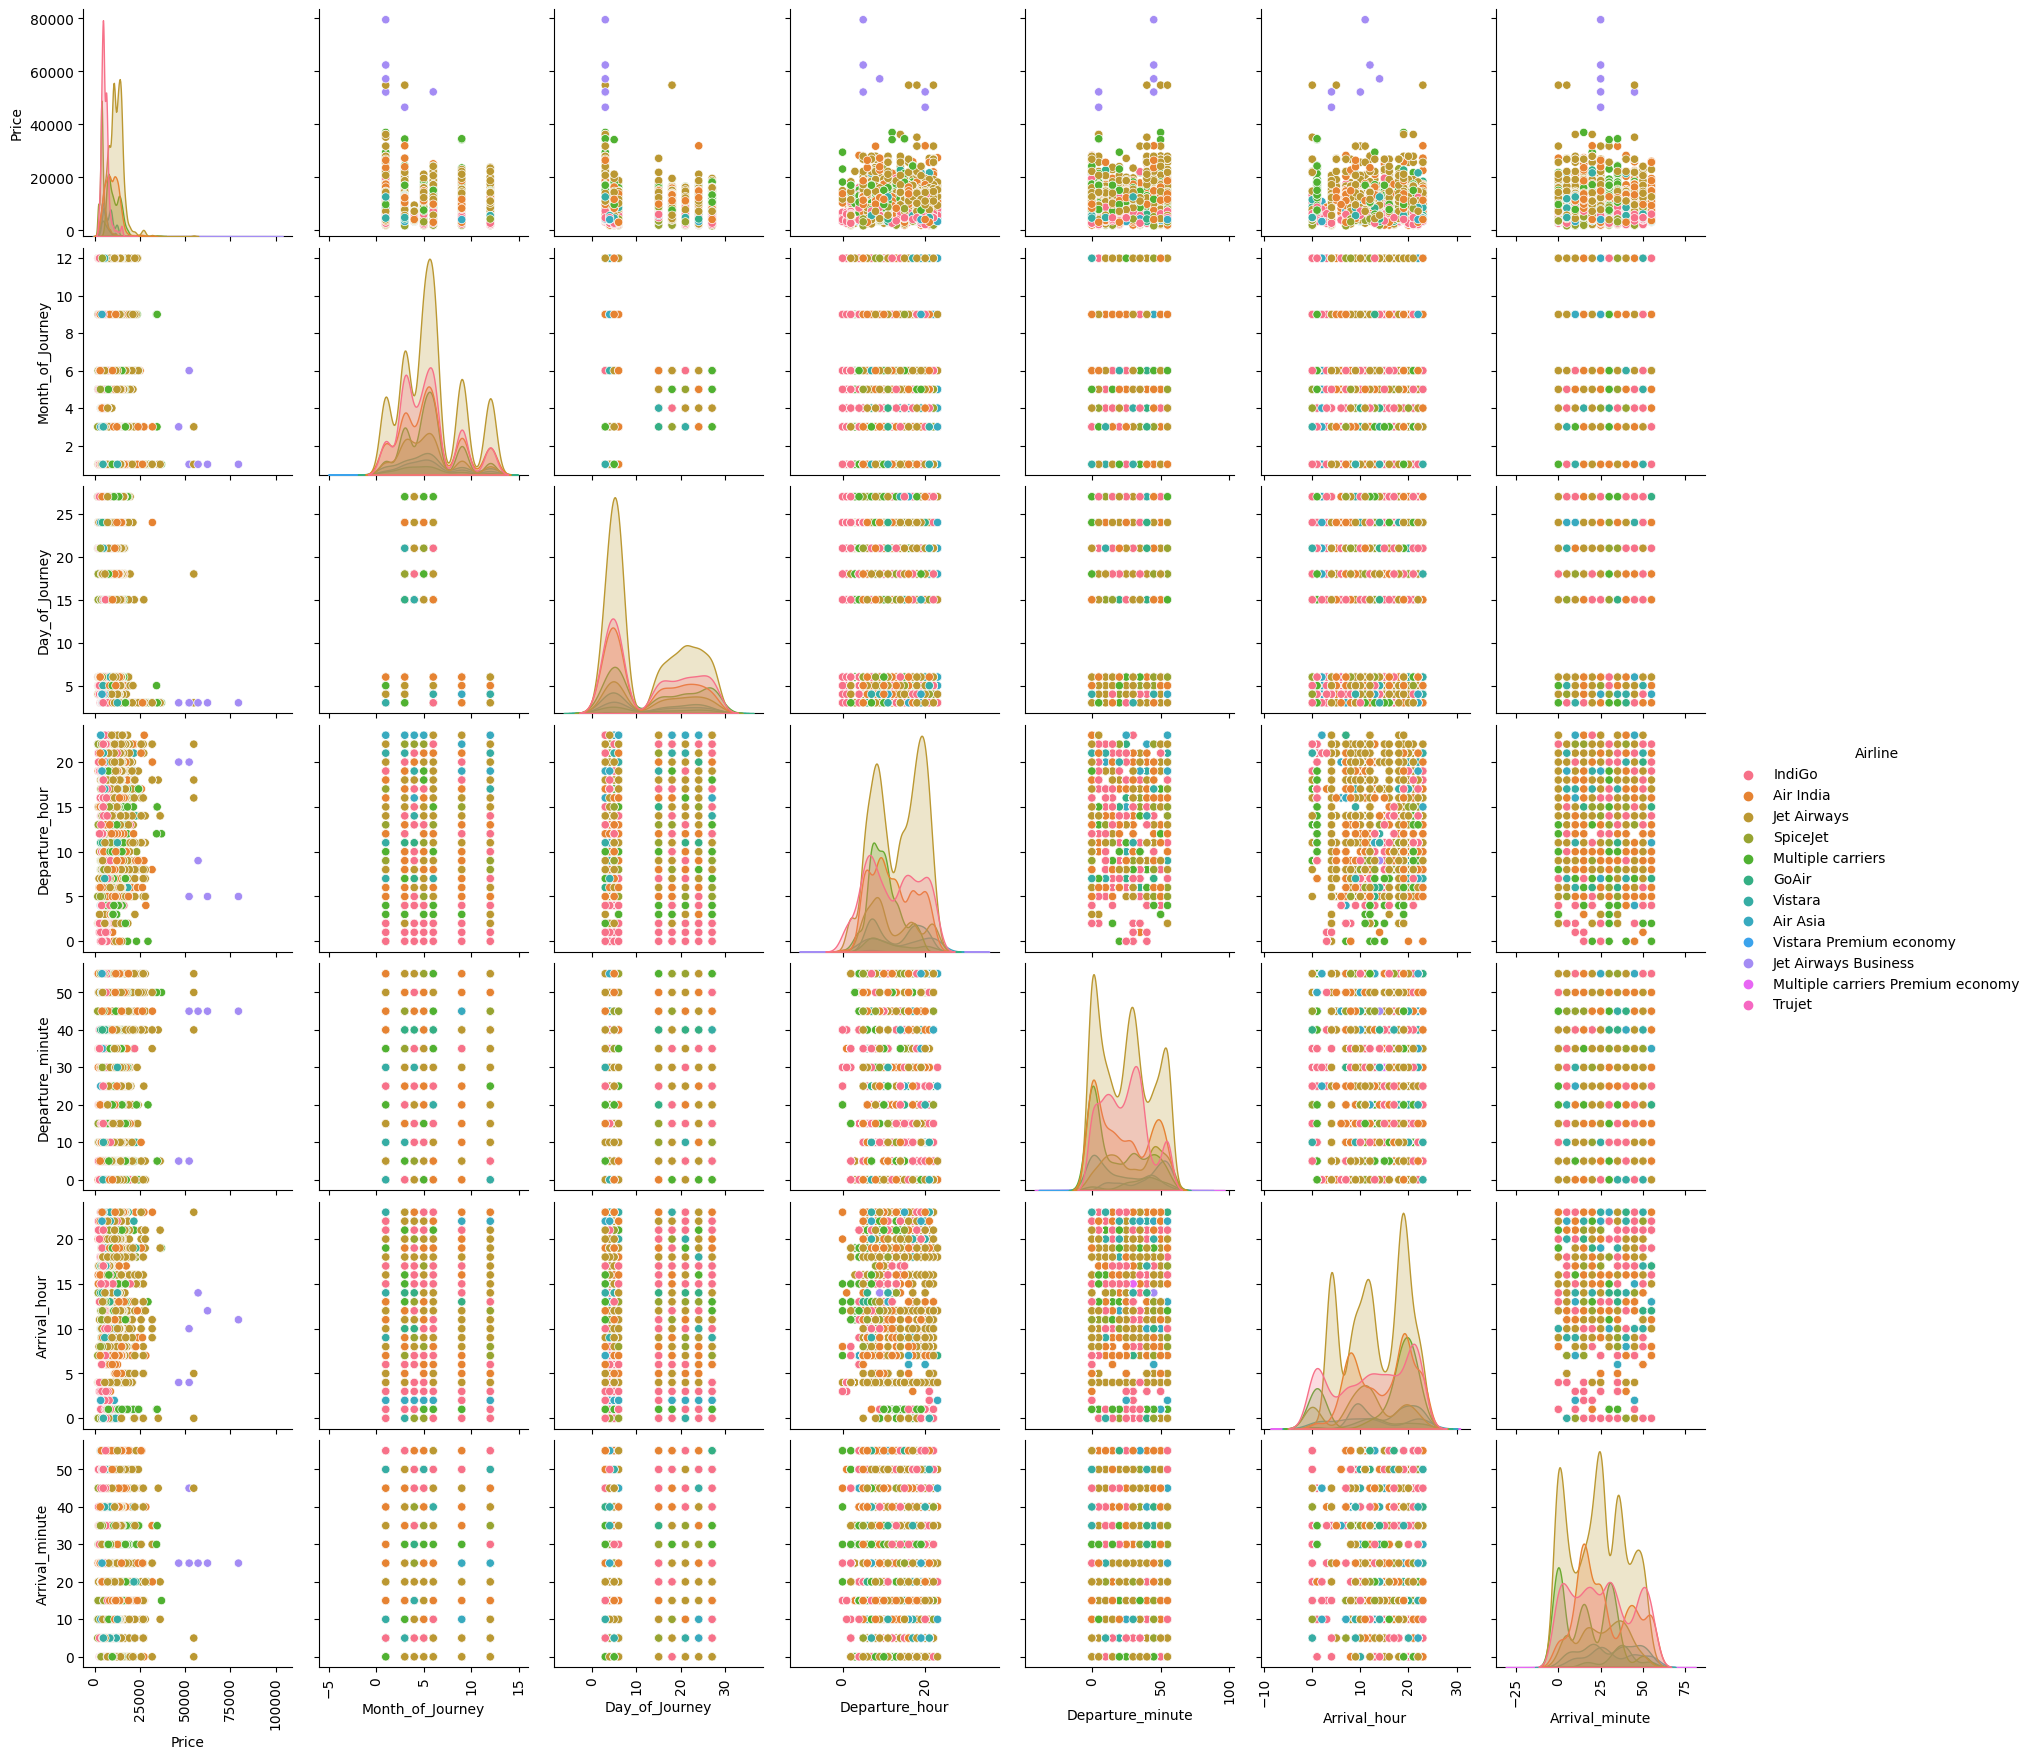

In [48]:
plt.style.use('default')
g = sns.pairplot(train_data, hue='Airline')
for ax in g.axes.flat:
    ax.tick_params("x", labelrotation=90)
plt.show()

In [49]:
#Encoding using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler, power_transform
oe=OrdinalEncoder()
def ordinal_encoder(df, col):
    df[col]=oe.fit_transform(df[col])
    return df
df_train=ordinal_encoder(train_data,['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'])

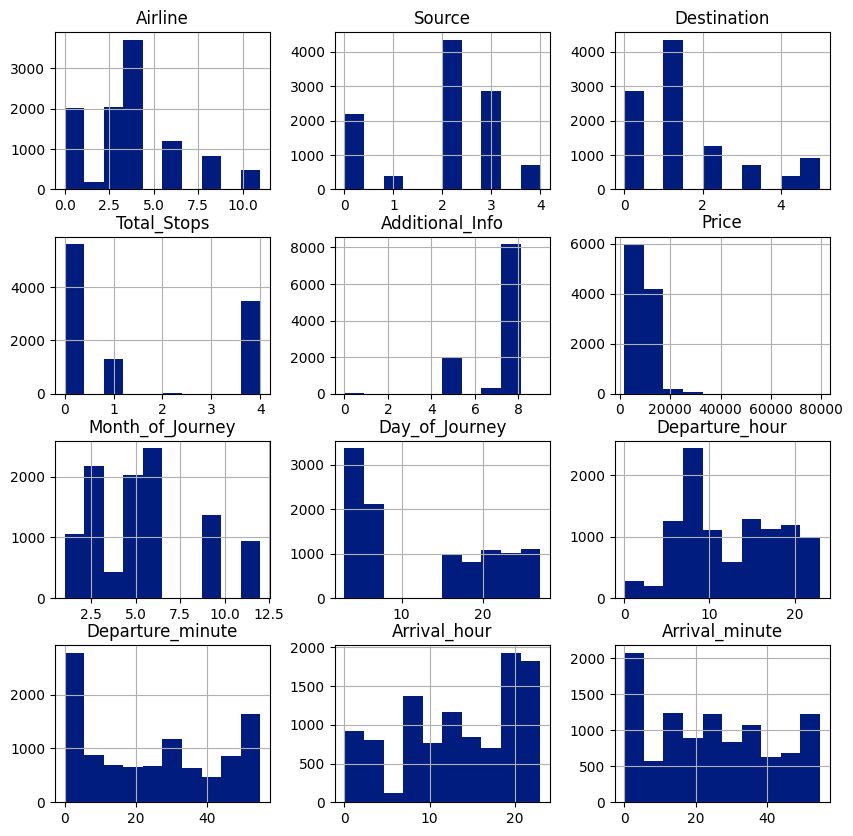

In [51]:
#Barcharts see the data distribution
plt.style.use('seaborn-dark-palette')
train_data.hist(figsize=(10,10))
plt.show()

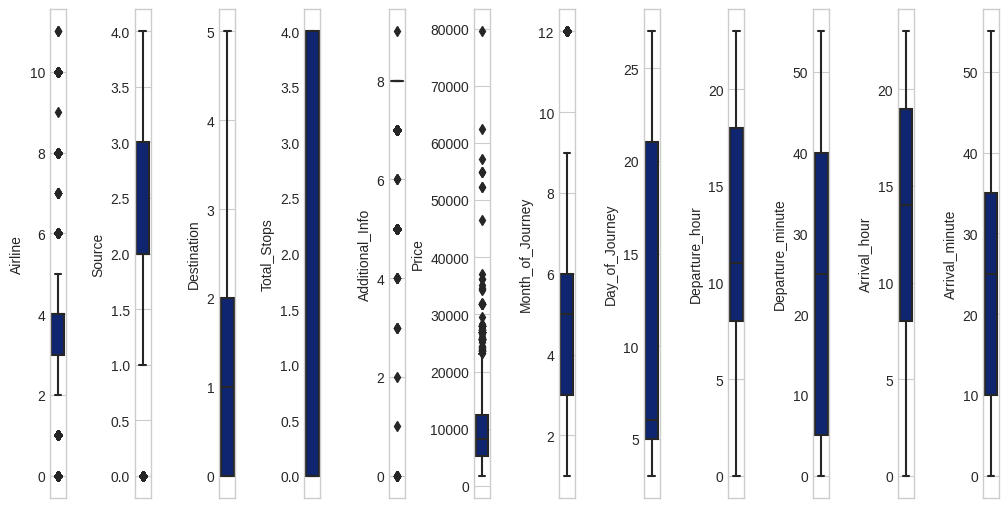

In [53]:
#Box plot to notice the outliers
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=12, nrows=1, figsize=(10,5))
index = 0
ax = ax.flatten()
for col, value in df_train.items():
    sns.boxplot(y=col, data=train_data, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

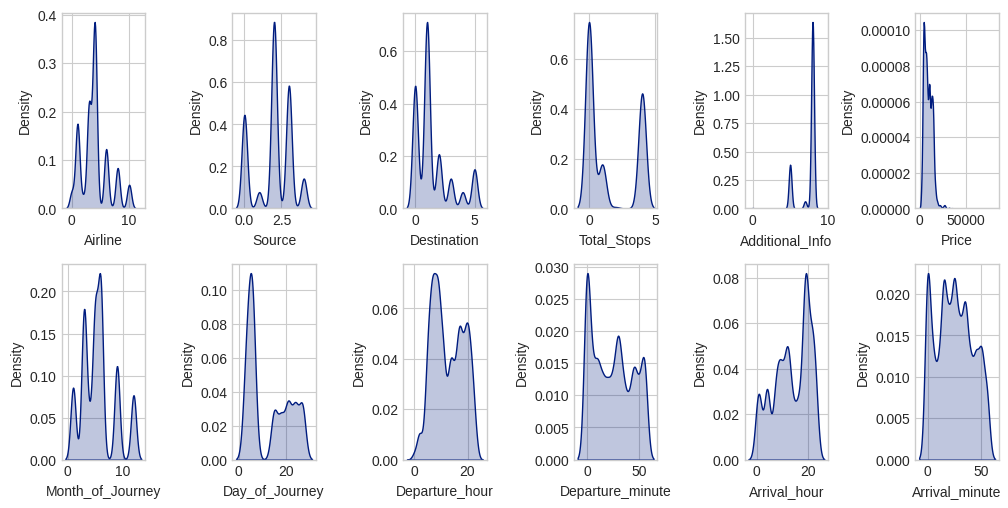

In [54]:
#distribution plots to notice the outliers
fig, ax = plt.subplots(ncols=6, nrows=2, figsize=(10,5))
index = 0
ax = ax.flatten()
for col, value in train_data.items():
    sns.distplot(value, ax=ax[index], hist=False, kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

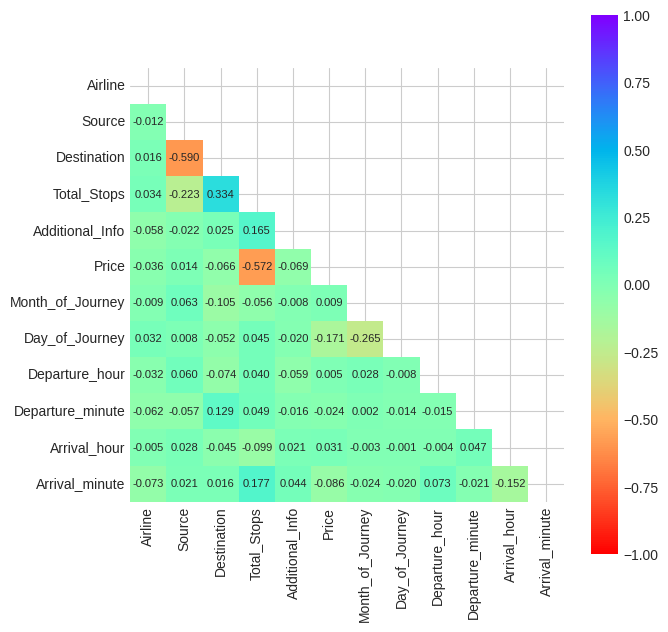

In [55]:
#Correlation HeatMap
plt.style.use('seaborn-pastel')
upper_triangle = np.triu(df_train.corr())
plt.figure(figsize=(7,7))
sns.heatmap(train_data.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', annot_kws={'size':8}, cmap="rainbow_r", mask=upper_triangle)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

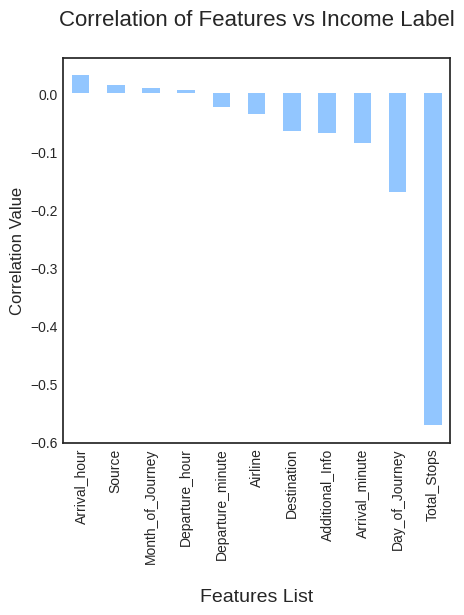

In [56]:
#Correlation barplot
plt.style.use('seaborn-white')
df_corr = train_data.corr()
plt.figure(figsize=(5,5))
df_corr['Price'].sort_values(ascending=False).drop('Price').plot.bar()
plt.title("Correlation of Features vs Income Label\n", fontsize=16)
plt.xlabel("\nFeatures List", fontsize=14)
plt.ylabel("Correlation Value", fontsize=12)
plt.show()

In [57]:
X = train_data.drop('Price', axis=1)
Y = train_data['Price']

# Feature Scaling

In [58]:
#Displaying all the features after applying scaling technique to avoid bias output
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,-0.414916,-1.646877,2.404213,1.392916,0.497963,-0.846221,1.293326,1.662578,-0.234123,-1.807045,-0.888367
1,-1.260756,0.882057,-0.972012,-0.254274,0.497963,-1.513956,-0.867922,-1.305841,1.360364,-0.056554,-0.586611
2,0.008004,0.039079,-0.296767,-0.254274,0.497963,1.156984,-0.754172,-0.607390,0.031625,-1.369422,0.016902
3,-0.414916,0.882057,-0.972012,-0.803337,0.497963,2.158586,-0.867922,0.964126,-1.031367,1.402189,0.318658
4,-0.414916,-1.646877,2.404213,-0.803337,0.497963,-1.513956,-1.095422,0.614900,1.360364,1.110440,0.620415


In [59]:
#Finding the best random state for building Regression Models
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
maxAccu=0
maxRS=0
for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LinearRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    r2 = r2_score(Y_test, pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print("Best R2 score is", maxAccu,"on Random State", maxRS)

Best R2 score is 0.4194390126695826 on Random State 754


,Importance
Features,
Total_Stops,0.423
Airline,0.144
Day_of_Journey,0.126
Month_of_Journey,0.070
Additional_Info,0.066
Arrival_hour,0.042
Departure_hour,0.040
Departure_minute,0.030
Arrival_minute,0.024


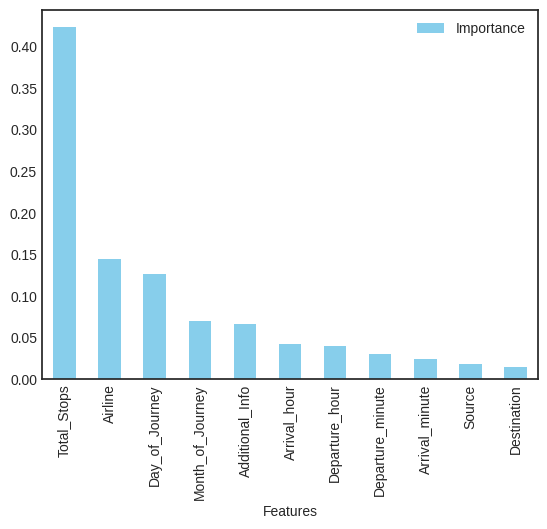

In [60]:
#Feature importance
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(X_train, Y_train)
importances = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('Importance', ascending=False).set_index('Features')
importances.plot.bar(color='skyblue')
importances

# Regression

## Core Regression Model

In [61]:
# Regression Model Function
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
def reg(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=754)
    model.fit(X_train, Y_train) #Training the model
    pred = model.predict(X_test) #Predicting Y_test
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

I have developed a regression function that divides the features and labels for training and testing, trains the model, makes a prediction about the label, computes the RMSE score, produces the R2 score, computes the Cross Validation score, and ultimately determines the difference between the R2 and CoV scores.

## Linear Regression

In [62]:
model=LinearRegression()
reg(model, X, Y)

RMSE Score is: 3253.245213499442
R2 Score is: 41.94390126695826
Cross Validation Score: 37.02843675760597
R2 Score - Cross Validation Score is 4.91546450935229


## Ridge Regression

In [64]:
from sklearn.linear_model import Ridge
model=Ridge(alpha=1e-2)
reg(model, X, Y)

RMSE Score is: 3253.245040007318
R2 Score is: 41.94390745909867
Cross Validation Score: 37.028437027181305
R2 Score - Cross Validation Score is 4.915470431917363


## Lasso Regression

In [67]:
from sklearn.linear_model import Lasso
model=Lasso(alpha=1e-2)
reg(model, X, Y)

RMSE Score is: 3253.2429978029863
R2 Score is: 41.94398034777752
Cross Validation Score: 37.028437582952144
R2 Score - Cross Validation Score is 4.915542764825375


## Support Vector Regression

In [68]:
from sklearn.svm import SVR
model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
reg(model, X, Y)

RMSE Score is: 4217.930182317322
R2 Score is: 2.408268550434034
Cross Validation Score: 2.1075676061836113
R2 Score - Cross Validation Score is 0.3007009442504227


## Decision Tree Regression

In [69]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(criterion="poisson", random_state=111)
reg(model, X, Y)

RMSE Score is: 1963.137378430306
R2 Score is: 78.85948153600039
Cross Validation Score: 83.03876445447456
R2 Score - Cross Validation Score is -4.179282918474172


## Random Forest Regression

In [70]:
model=RandomForestRegressor(max_depth=2, max_features="sqrt")
reg(model, X, Y)

RMSE Score is: 3057.131550826813
R2 Score is: 48.732457037648736
Cross Validation Score: 44.506540191859
R2 Score - Cross Validation Score is 4.225916845789733


## Gradient Boosting Regressoion

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
reg(model, X, Y)

RMSE Score is: 2483.342144175776
R2 Score is: 66.17113962902667
Cross Validation Score: 66.70642192944487
R2 Score - Cross Validation Score is -0.5352823004182028


## Ada Boost Regression

In [72]:
from sklearn.ensemble import AdaBoostRegressor
model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
reg(model, X, Y)

RMSE Score is: 3066.187569306349
R2 Score is: 48.42827158308161
Cross Validation Score: 32.32037483858014
R2 Score - Cross Validation Score is 16.107896744501467


## XG Boost Regressor

In [73]:
from xgboost import XGBRegressor
model=XGBRegressor()
reg(model, X, Y)

RMSE Score is: 1488.1763247556164
R2 Score is: 87.85148954110224
Cross Validation Score: 89.42123451812007
R2 Score - Cross Validation Score is -1.5697449770178338


## Hyperparameter tuning for the XG Boost Regression

In [76]:
from sklearn.model_selection import GridSearchCV
fmod_param = {'booster' : ['gbtree','dart','gblinear'],
              'importance_type' : ['gain','split'],
              'n_estimators' : [100,200,500],
              'eta' : [0.001, 0.01, 0.1]}
GSCV = GridSearchCV(XGBRegressor(), fmod_param, cv=5)
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'booster': ['gbtree', 'dart', 'gblinear'],
                         'eta': [0.001, 0.01, 0.1],
                         'importance_type': ['gain', 'split'],
                         'n_estimators': [100, 200, 500]})

In [77]:
GSCV.best_params_

{'booster': 'dart', 'eta': 0.1, 'importance_type': 'gain', 'n_estimators': 500}

In [78]:
Regression_Model = XGBRegressor(booster='dart', eta=0.1, importance_type='gain', n_estimators=500)
Classifier = Regression_Model.fit(X_train, Y_train)
fmod_pred = Regression_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred)*100
print("R2 score:", fmod_r2)

R2 score: 88.33642796620133


# Testing model with Testing Data

## Loding Test Data

In [79]:
test_data = pd.read_excel("Flight_Data_Testing.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [80]:
#Checking Nulls
test_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [81]:
#Droping duplicates
test_data.drop_duplicates(inplace=True)
test_data.shape

(2645, 10)

In [82]:
#Converting coloumns containing dates to datetime
test_data = date_sep(test_data)
test_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Year_of_Journey,Month_of_Journey,Day_of_Journey
0,Jet Airways,Delhi,Cochin,17:30,04:25 07 Jun,1 stop,No info,2019,6,6
1,IndiGo,Kolkata,Banglore,06:20,10:20,1 stop,No info,2019,12,5
2,Jet Airways,Delhi,Cochin,19:15,19:00 22 May,1 stop,In-flight meal not included,2019,5,21
3,Multiple carriers,Delhi,Cochin,08:00,21:00,1 stop,No info,2019,5,21
4,Air Asia,Banglore,Delhi,23:55,02:45 25 Jun,non-stop,No info,2019,6,24


In [83]:
#Converting coloumns containing time to datetime
test_data = time_sep(test_data)
test_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Year_of_Journey,Month_of_Journey,Day_of_Journey,Departure_hour,Departure_minute,Arrival_hour,Arrival_minute
0,Jet Airways,Delhi,Cochin,1 stop,No info,2019,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,1 stop,No info,2019,12,5,6,20,10,20
2,Jet Airways,Delhi,Cochin,1 stop,In-flight meal not included,2019,5,21,19,15,19,0
3,Multiple carriers,Delhi,Cochin,1 stop,No info,2019,5,21,8,0,21,0
4,Air Asia,Banglore,Delhi,non-stop,No info,2019,6,24,23,55,2,45


In [84]:
#Data Encoding using ordinal encoder
test_data.drop("Year_of_Journey", axis=1, inplace=True)
df_test=ordinal_encoder(test_data, ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info'])

In [85]:
#Normalizing data using StandardScaler
test_data = pd.DataFrame(scaler.fit_transform(test_data), columns=test_data.columns)

## Final testing Model with Data

In [86]:
predited_values = Regression_Model.predict(df_test)
data = pd.DataFrame(predited_values, columns=['Predicted Prices'])
data # Printing predicted values

,Predicted Prices
0,12187.641602
1,12139.079102
2,10813.004883
3,10479.959961
4,3736.626953
...,...
2640,13663.725586
2641,3631.235352
2642,12187.641602
2643,13374.708984
